In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
LIMITS = [3, 3.1] # Пороговые значения
FILE_PATH = "new_data.csv" # Путь к входным данным

In [ ]:
# Загрузка данных
df = pd.read_csv('new_data.csv', parse_dates=['ds'])

# Преобразуем даты в числа (количество дней от начала)
x = (df['ds'] - df['ds'].min()).dt.days.values
y = df['y'].values

In [ ]:
# Линейная аппроксимация (метод наименьших квадратов)
A = np.vstack([x, np.ones(len(x))]).T
slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

In [ ]:
# Ваши пороги
cross_days = []
# Для каждого порога ищем точку пересечения с прямой
for limit in LIMITS:
    if slope != 0:
        x_cross = (limit - intercept) / slope
        if x_cross >= 0:
            cross_days.append(x_cross)
        else:
            cross_days.append(None)
    else:
        cross_days.append(None)

In [ ]:
# Прямая только до самой дальней точки пересечения/последней фактической даты
max_cross = max([d for d in cross_days if d is not None] + [x[-1]])
x_fit = np.linspace(0, max_cross, 200)
y_fit = slope * x_fit + intercept
ds_fit = df['ds'].min() + pd.to_timedelta(x_fit, unit='D')
plt.figure(figsize=(10, 6))
# Точки данных
plt.scatter(df['ds'], y, label='Данные', color='blue', s=25)

# Аппроксимирующая прямая
plt.plot(ds_fit, y_fit, color='red', label='Линейная аппроксимация', zorder=2)

In [ ]:
# Пороги и вертикальные линии пересечений
for limit, x_cross in zip(LIMITS, cross_days):
    plt.axhline(limit, linestyle='--', color='orange' if limit==LIMITS[0] else 'crimson', label=f'Порог {limit}')
    if x_cross is not None and x_cross >= 0:
        date_cross = df['ds'].min() + pd.Timedelta(days=x_cross)
        plt.axvline(date_cross, linestyle=':', color='gray')
        plt.text(date_cross, limit + 0.05, f'{date_cross.date()}', rotation=90, va='bottom')
        print(f"Порог {limit} будет достигнут примерно: {date_cross.date()}")
    else:
        print(f"Порог {limit} не будет достигнут аппроксимирующей прямой.")

Порог 3 будет достигнут примерно: 2026-06-11
Порог 3.1 будет достигнут примерно: 2026-07-18


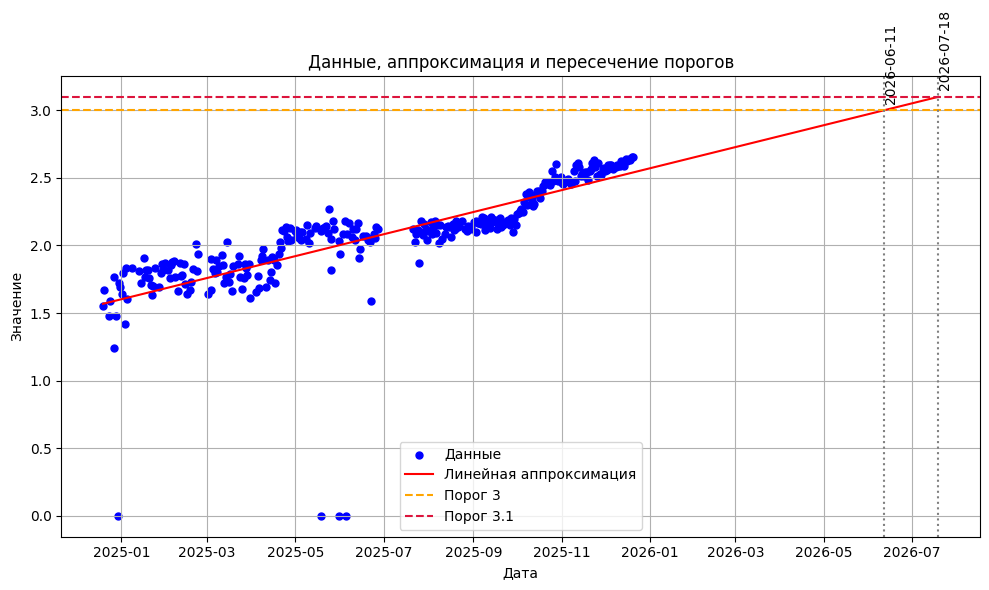

In [ ]:
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Данные, аппроксимация и пересечение порогов')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
